In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/Admission_Predict_Ver1.1.csv', index_col=0)

In [3]:
# First 5 line
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Last 5 line
df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93
499,312,103,4,4.0,5.0,8.43,0,0.73
500,327,113,4,4.5,4.5,9.04,0,0.84


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


In [6]:
duplicate = df.duplicated()
print(f'Number of repeated rows: {duplicate.sum()}')

Number of repeated rows: 0


In [8]:
df.sum().isnull()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

No missing data

In [9]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
# Clear spaces in all columns
df.columns = df.columns.str.strip()


**Exploratory Data Analysis (EDA)**

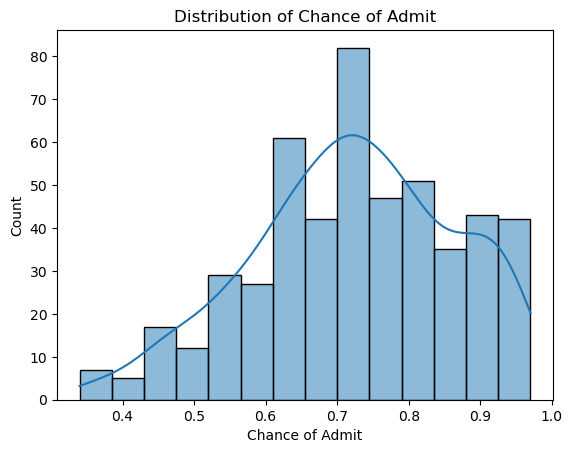

In [11]:
# Distribution of the Y variable
sns.histplot(df['Chance of Admit'], kde=True)
plt.title('Distribution of Chance of Admit')
plt.show()


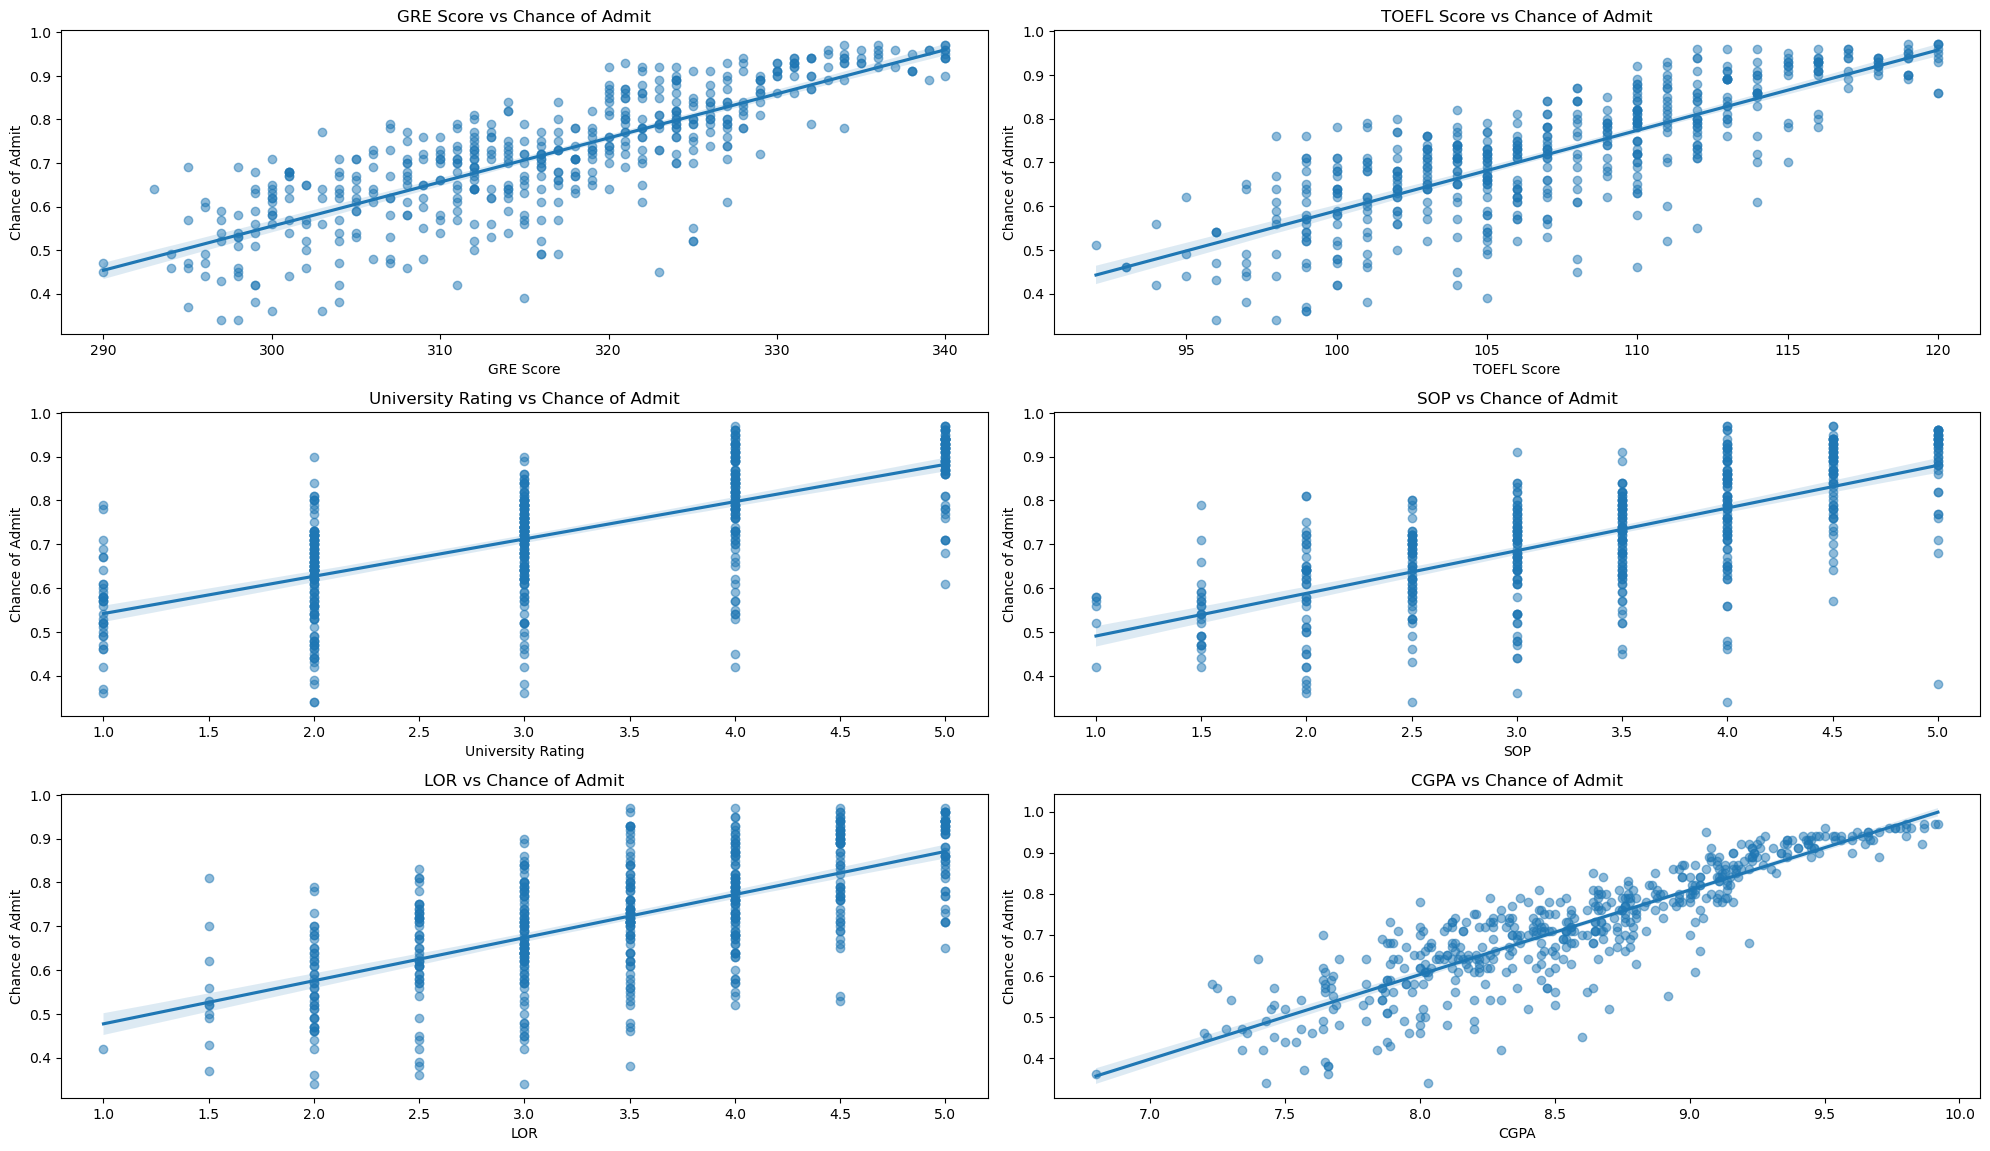

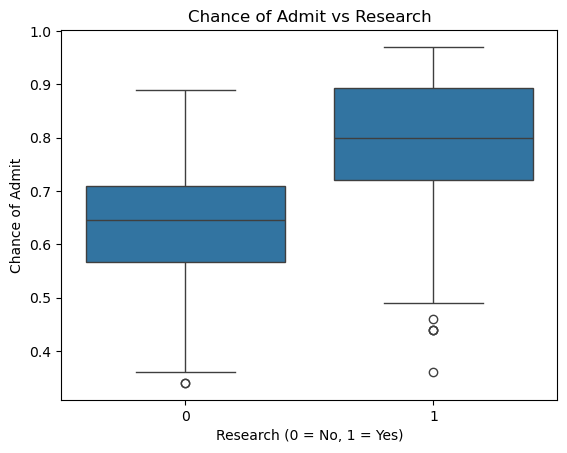

In [12]:
# Y variable (target) and X variables (features)
target = 'Chance of Admit'
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']


plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 2, i+1)
    sns.regplot(x=df[feature], y=df[target], scatter_kws={'alpha':0.5})
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

sns.boxplot(x=df['Research'], y=df['Chance of Admit'])
plt.title('Chance of Admit vs Research')
plt.xlabel('Research (0 = No, 1 = Yes)')
plt.ylabel('Chance of Admit')
plt.show()


In [13]:
# Inputs

X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1
497,337,117,5,5.0,5.0,9.87,1
498,330,120,5,4.5,5.0,9.56,1


In [14]:
# output

y = df['Chance of Admit']
y

Serial No.
1      0.92
2      0.76
3      0.72
4      0.80
5      0.65
       ... 
496    0.87
497    0.96
498    0.93
499    0.73
500    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [15]:
# sklearn LinearRegression

from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
# First let's look at the size of the input and output

print("The dimension of X:", X.shape)
print("The dimension of y:", y.shape)

The dimension of X: (500, 7)
The dimension of y: (500,)


In [18]:
# We need to reshape y
# (200, 1) 

y = y.values.reshape(-1, 1)

In [19]:
y.shape

(500, 1)

In [20]:
# scikit-learn import

from sklearn.model_selection import train_test_split

In [21]:
# train data
# X_train, y_train

# test_data
# X_test, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [22]:
print("The shape of X_train:", X_train.shape)
print("The shape of y_train:", y_train.shape)

print("The shape of X_test:", X_test.shape)
print("The shape of y_test:", y_test.shape)

The shape of X_train: (350, 7)
The shape of y_train: (350, 1)
The shape of X_test: (150, 7)
The shape of y_test: (150, 1)


In [23]:
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
# intercept -> beta 0

print('intercept:', lr.intercept_)

intercept: [-1.20273823]


In [25]:
# slope = coefficient -> beta 1, beta 2, beta 3, beta 4, beta 5, beta 6, beta 7

print('slope (coeffificent) eğim:', lr.coef_)

slope (coeffificent) eğim: [[0.00112975 0.00351311 0.00523687 0.00055287 0.0172289  0.12746683
  0.02759197]]


In [26]:
coefficients = pd.DataFrame(lr.coef_, columns = ['beta_1 (GRE Score)', 'beta_2 (TOEFL Score)', 'beta_3 (University Rating)', 'beta_4 (SOP)', 'beta_5 (LOR)', 'beta_6 (CGPA)', 'beta_7 (Research)'])
coefficients

,beta_1 (GRE Score),beta_2 (TOEFL Score),beta_3 (University Rating),beta_4 (SOP),beta_5 (LOR),beta_6 (CGPA),beta_7 (Research)
0,0.00113,0.003513,0.005237,0.000553,0.017229,0.127467,0.027592


In [27]:
# Make predictions

y_pred = lr.predict(X_test)

In [28]:
# Print the prediction

y_pred

array([[0.85936541],
       [0.47154976],
       [0.62740186],
       [0.44916291],
       [0.64488725],
       [0.85685195],
       [0.58782912],
       [0.66794686],
       [0.81367585],
       [0.68745448],
       [0.66556606],
       [0.60723778],
       [0.89479135],
       [0.75501351],
       [0.63715258],
       [0.50465046],
       [0.59340591],
       [0.74838099],
       [0.55739549],
       [0.70380753],
       [0.89677038],
       [0.61197102],
       [0.84931353],
       [0.82671874],
       [0.99640023],
       [0.60241011],
       [0.68227615],
       [0.93605022],
       [0.87923201],
       [0.70094354],
       [0.79069517],
       [0.85227995],
       [0.74971101],
       [0.55178144],
       [0.74092954],
       [0.78165518],
       [0.79780603],
       [0.57713873],
       [0.53955108],
       [0.70194418],
       [0.9480288 ],
       [0.59272774],
       [0.83702884],
       [0.78650937],
       [0.81290961],
       [0.54763814],
       [0.59934992],
       [0.874

In [29]:
# The shape of the prediction data

y_pred.shape

(150, 1)

In [30]:
# The shape of the test data
# y_true

y_test.shape

(150, 1)

In [31]:
# Let's see the first 10 actual y values

y_test[0:10]

array([[0.78],
       [0.54],
       [0.64],
       [0.47],
       [0.7 ],
       [0.88],
       [0.57],
       [0.72],
       [0.84],
       [0.64]])

In [32]:
# Let's see the first 10 predicted values

y_pred[0:10]

array([[0.85936541],
       [0.47154976],
       [0.62740186],
       [0.44916291],
       [0.64488725],
       [0.85685195],
       [0.58782912],
       [0.66794686],
       [0.81367585],
       [0.68745448]])

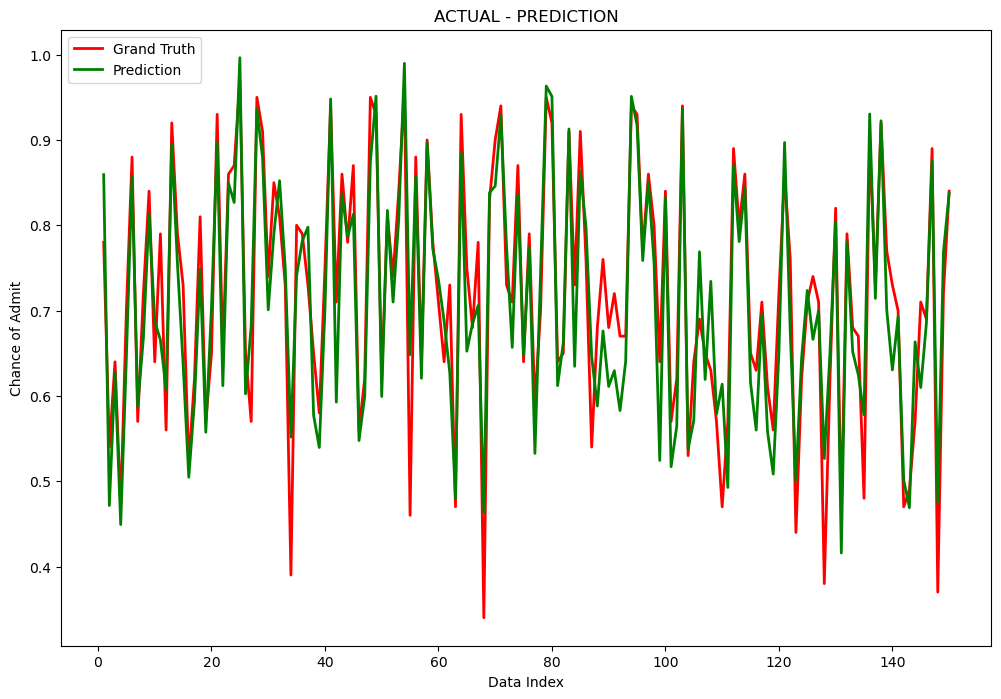

In [33]:
# Let's see the change in each prediction point
indexler = range(1,151)

# Grand Truth
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test, label='Grand Truth', color='red', linewidth=2)

# Prediction
ax.plot(indexler, y_pred, label='Prediction', color='green', linewidth=2)

plt.title('ACTUAL - PREDICTION')
plt.xlabel('Data Index')
plt.ylabel('Chance of Admit')
plt.legend(loc='upper left')
plt.show()

In [34]:
import numpy as np

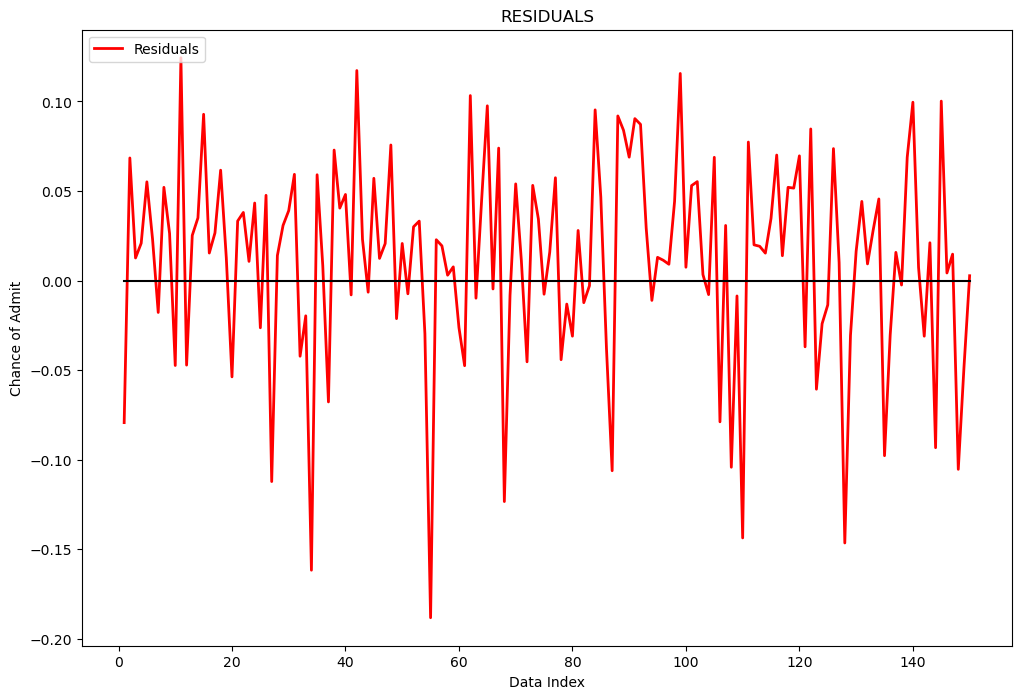

In [35]:
# Let's see the error at each prediction point
indexler = range(1,151)

# Residuls
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test - y_pred, label='Residuals', color='red', linewidth=2)

# Plot the zero line
ax.plot(indexler, np.zeros(150), color='black')

plt.title('RESIDUALS')
plt.xlabel('Data Index')
plt.ylabel('Chance of Admit')
plt.legend(loc='upper left')
plt.show()

In [36]:
# sklearn import

from sklearn.metrics import r2_score, mean_squared_error

In [37]:
# Let's calculate R^2

r_2 = r2_score(y_test, y_pred)

In [38]:
# Print R^2 

print('R^2:', r_2)

R^2: 0.8355717634850114


In [39]:
# Print R^2 as a percentage

print('R^2 %:', r_2 * 100)

R^2 %: 83.55717634850114


**\(R^2\) = %83.5571 is a pretty good percentage, meaning the model can accurately predict %83.5571 of the variations in the dependent variable.**

In [40]:
# MSE -> RMSE

mse = mean_squared_error(y_test, y_pred)

In [41]:
# Print MSE

print('MSE:', mse)

MSE: 0.003409142513908782


In [42]:
# RMSE

import math
rmse = math.sqrt(mse)

In [43]:
# Print RMSE

print('RMSE:', rmse)

RMSE: 0.05838786272770037


### RMSE: 0.058

The **Root Mean Squared Error (RMSE)** of 0.058 indicates that, on average, the model's predictions deviate from the actual values by 0.058 units. Given that the target variable is within the range of 0 to 1, this error rate is relatively low, suggesting that the model's predictions are quite accurate. A lower RMSE generally reflects better model performance.


In [44]:
import statsmodels.api as sm

In [45]:
# Run OLS (Ordinary Least Squares) with statsmodels
# The statsmodels OLS function does not automatically assign a value for beta_0
# so we need to add a coefficient of 1 for beta_0 ourselves

X_train_ols = sm.add_constant(X_train)

In [46]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
154,324,105,3,3.0,4.0,8.75,0
85,340,115,5,4.5,4.5,9.45,1
311,320,104,3,3.0,3.5,8.74,1
495,301,99,3,2.5,2.0,8.45,1
127,323,113,3,4.0,3.0,9.32,1
...,...,...,...,...,...,...,...
344,305,103,2,2.5,3.5,8.13,0
360,321,107,2,2.0,1.5,8.44,0
324,305,102,2,2.0,2.5,8.18,0


In [47]:
X_train_ols

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,,
154,1.0,324,105,3,3.0,4.0,8.75,0
85,1.0,340,115,5,4.5,4.5,9.45,1
311,1.0,320,104,3,3.0,3.5,8.74,1
495,1.0,301,99,3,2.5,2.0,8.45,1
127,1.0,323,113,3,4.0,3.0,9.32,1
...,...,...,...,...,...,...,...,...
344,1.0,305,103,2,2.5,3.5,8.13,0
360,1.0,321,107,2,2.0,1.5,8.44,0
324,1.0,305,102,2,2.0,2.5,8.18,0


In [48]:
# Create an OLS model with statsmodels

sm_model = sm.OLS(y_train, X_train_ols)

In [49]:
# Get the results of the OLS model

result = sm_model.fit()

In [50]:
# Print the OLS summary table

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     212.8
Date:                Tue, 10 Sep 2024   Prob (F-statistic):          1.71e-120
Time:                        01:58:06   Log-Likelihood:                 485.93
No. Observations:                 350   AIC:                            -955.9
Df Residuals:                     342   BIC:                            -925.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2027      0.12




We are redesigning our model by removing the variables SOP, University Rating, and GRE Score from the input features (X) because their p-values are greater than 0.05.

In [51]:
# New feature matrix
# X_train_new
# X_test_new

X_train_new = X_train[['TOEFL Score', 'LOR', 'CGPA', 'Research']]
X_train_new.head()

,TOEFL Score,LOR,CGPA,Research
Serial No.,,,,
154,105,4.0,8.75,0
85,115,4.5,9.45,1
311,104,3.5,8.74,1
495,99,2.0,8.45,1
127,113,3.0,9.32,1


In [52]:
X_test_new = X_test[['TOEFL Score', 'LOR', 'CGPA', 'Research']]
X_test_new.head()

,TOEFL Score,LOR,CGPA,Research
Serial No.,,,,
70,115,4.0,9.16,1
30,99,2.0,7.30,0
472,103,4.0,8.09,0
345,96,2.0,7.34,0
55,110,3.5,8.00,0


In [53]:
# Rebuild the model

lr.fit(X_train_new, y_train)

LinearRegression()

In [54]:
# Get the new predictions

y_pred_new = lr.predict(X_test_new)

In [55]:
# Print

y_pred_new

array([[0.85991993],
       [0.45429732],
       [0.62044227],
       [0.44623857],
       [0.63067259],
       [0.85298622],
       [0.58812273],
       [0.66667069],
       [0.81756104],
       [0.70257846],
       [0.67345785],
       [0.6041826 ],
       [0.89045861],
       [0.75743252],
       [0.64095037],
       [0.49359202],
       [0.59429857],
       [0.75742814],
       [0.55174871],
       [0.71944648],
       [0.89351842],
       [0.59929313],
       [0.85450197],
       [0.81463598],
       [1.00123719],
       [0.59274575],
       [0.67873371],
       [0.93974683],
       [0.87198295],
       [0.68348843],
       [0.79159353],
       [0.86166372],
       [0.74851822],
       [0.54024821],
       [0.7406592 ],
       [0.77735894],
       [0.79928073],
       [0.56851765],
       [0.55240891],
       [0.69677855],
       [0.94369925],
       [0.57832019],
       [0.85139336],
       [0.79070091],
       [0.81477511],
       [0.54901462],
       [0.59028992],
       [0.854

In [56]:
# Let's calculate R^2

r_2_new = r2_score(y_test, y_pred_new)
r_2_new

0.8229692846580676

As observed, the R² score has only slightly changed, indicating that the variables we removed did not have a significant impact on the model.

In [59]:
# New OLS

X_train_new_ols = sm.add_constant(X_train_new)

In [61]:
# Create an OLS model with statsmodels
sm_model = sm.OLS(y_train, X_train_new_ols)

In [62]:
# Get the results of the OLS model
result_new = sm_model.fit()

In [63]:
# Print the OLS summary table

print(result_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     368.8
Date:                Tue, 10 Sep 2024   Prob (F-statistic):          3.53e-123
Time:                        02:12:18   Log-Likelihood:                 483.34
No. Observations:                 350   AIC:                            -956.7
Df Residuals:                     345   BIC:                            -937.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.0664      0.068    -15.581      

There are no variables with a p-value greater than 0.05, and our R-squared value is very close to the one from the previous OLS table.